# Deep Neural Network for image classification (step by step)

Here we build a deep neural network for image classification from scratch, using Numpy. The key steps of the program are the following:

- Initialize the parameters for an $L$-layer neural network.
- Implement the forward propagation.
- Compute the loss function.
- Implement the backward propagation.
- Finally update the parameters.

**Note:** 1) We implement $\mathrm{L_2}$ regularization to solve the problem of overfitting. 
2) Since the training set is very small we use gradient descent.

In [1]:
# Import standard packages
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import a file containing all the functions needed to 
# build our neural network from scratch.
from NN_prop_utils import *

%matplotlib inline

# Set the following values globally
# Ticks label size
label_size = 9
mpl.rcParams['xtick.labelsize'] = label_size     
mpl.rcParams['ytick.labelsize'] = label_size
#Line width
mpl.rcParams['axes.linewidth'] = 1.5
plt.rc('font', family='Helvetica')

In [2]:
# Load data into the notebook
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

## Data set

For this classification problem of *cat vs. non-cat* we use the train_catvnoncat.h5 and test_catvnoncat.h5 datasets.

**Datasets:** it contains
   - training set made of *m_train* images labelled as cat (1) or non-cat (0)
   - test set made of *m_test* images labelled as cat (1) or non-cat (0)
   
Note that each image is of shape (num_px, num_px, 3), where num_px represents the number of pixel along one dimension and 3 is for the 3 color channes (RGB).
Images are thus stored as 3 matrices containing the red, green, and blue color codes.
The training set *train_x_orig* is hence of shape (m_train, num_px, num_px, 3) = (209, 64, 64, 3).

y = 1: it's a cat picture.


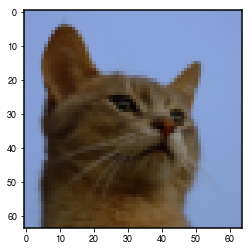

In [3]:
# Display the example of a picture
index = 192
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ": it's a " + classes[train_y[0, index]].decode("utf-8") +  " picture.")

### Reshape the dataset

Before feeding the dataset to the neural network, we need to reshape the images by unrolling them into a (num_px $*$ num_px $*$ 3)-dimensional vector.
The columns of the resulting matrix correspond to different training examples.

In [4]:
# Reshape the training and test examples by unrolling them
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # "-1" flattens the remaining dimensions.
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
# This is a simpler/shorter implementation of feature scaling and mean normalization,
# but for images should work quite well.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Here 12288 simply corresponds to 64$*$64$*$3, which is the size of one reshaped image vector.

## L-layer neural network

We build now our neural network using the gradient descent algorithm.

In [5]:
### Shape of the deep neural network ###
layers_dims = [12288, 20, 7, 5, 1]   # 4-layer model

In [19]:
# Here we define the L-layer model.

def L_layer_model_reg(X, Y, layers_dims, learning_rate, lambd, 
                      num_iterations = 3000, print_cost = False, plot_cost = False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """  
    
    np.random.seed(1)
    
    costs = []      # Keeps track of the cost function
    iters = []      # Keeps track of the number of iterations
    
    # Parameters initialization
    parameters = initialize_parameters(layers_dims)
    
    # Iterate using gradient descent
    for i in range(0, num_iterations + 1):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
    
        # Backward propagation.
        grads = L_model_backward_with_regularization(AL, Y, caches, lambd)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 200 training example.
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        # Record the costs.
        if i % 100 == 0:
            costs.append(cost)
            iters.append(i)
            
    # Plot the cost.
    if plot_cost == True:
        fig = plt.figure(dpi=150, figsize=(2, 1.6))
        plt.plot(iters, costs)
        plt.ylabel('cost')
        plt.xlabel('iterations')
        plt.title("Learning rate = " + str(learning_rate), fontsize = 10)
        plt.show()
    
    return parameters, costs

## Training of the neural network

We will now train the neural network using gradient descent.

Cost after iteration 0: 0.771749
Cost after iteration 200: 0.648263
Cost after iteration 400: 0.567047
Cost after iteration 600: 0.527930
Cost after iteration 800: 0.369126
Cost after iteration 1000: 0.315187
Cost after iteration 1200: 0.237419
Cost after iteration 1400: 0.189263
Cost after iteration 1600: 0.148214
Cost after iteration 1800: 0.129740
Cost after iteration 2000: 0.113821
Cost after iteration 2200: 0.102855
Cost after iteration 2400: 0.092878
Cost after iteration 2600: 0.085951
Cost after iteration 2800: 0.078247
Cost after iteration 3000: 0.073324


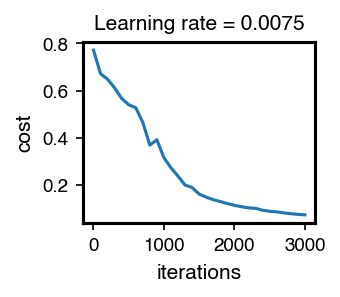

In [20]:
parameters, costs = L_layer_model_reg(train_x, train_y, layers_dims, learning_rate = 0.0075, 
                                      lambd = 0., num_iterations = 3000, print_cost = True, plot_cost = True)

## Performance

Here we look at the performance of the neural network on the training set and the test set.

In [21]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 99.043062201


In [22]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 78.0


## Tuning of the hyperparameters

Here we tweak the hyperparameters (learning rate and regularization parameter) to improve the performance of the model. 

We will find that regularization boosts the performance of the training set from **78%** to **84%**.

**Note:** given the very small training set, we cannot do much better than 84% accuracy on the test set. In order to solve the high variance problem we should get more data!

### Learning rate

Learning rate is: 0.0074
Final cost: 0.128844309153
 
Training set performance: 
Accuracy: 100.0
 
Test set performance: 
Accuracy: 76.0

-------------------------------------------------------

Learning rate is: 0.0075
Final cost: 0.134816481373
 
Training set performance: 
Accuracy: 99.5215311005
 
Test set performance: 
Accuracy: 84.0

-------------------------------------------------------

Learning rate is: 0.0076
Final cost: 0.154433360259
 
Training set performance: 
Accuracy: 99.043062201
 
Test set performance: 
Accuracy: 84.0

-------------------------------------------------------

Learning rate is: 0.0077
Final cost: 0.122149795975
 
Training set performance: 
Accuracy: 100.0
 
Test set performance: 
Accuracy: 74.0

-------------------------------------------------------

Learning rate is: 0.0078
Final cost: 0.121666645976
 
Training set performance: 
Accuracy: 100.0
 
Test set performance: 
Accuracy: 72.0

-------------------------------------------------------



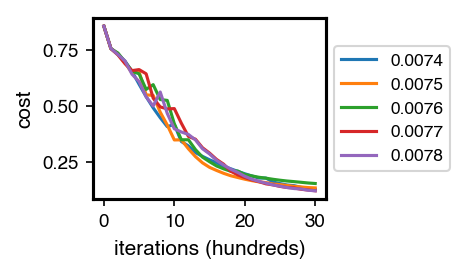

In [31]:
# Try different learning rates.
# Input the values by hand.
learning_rates = [0.0074, 0.0075, 0.0076, 0.0077, 0.0078]

# Try different learning rates at random on a log scale.
# This is because we want to try values on different scales:
# from 0.001 to 0.1.
# r = -2*np.random.rand(1, 10) - 1
# learning_rates = 10**r

# Store the parameters, costs, and predictions on
# both train and test set.
params = {}
costs = {}
preds_train = {}
preds_test = {}

#np.random.seed(1)

for i in learning_rates:
    print ("Learning rate is: " + str(i))
    # Here we train the different models.
    params[learning_rates.index(i)], costs[learning_rates.index(i)] =\
                        L_layer_model_reg(train_x, train_y, layers_dims, learning_rate = i, 
                                          lambd = 1., num_iterations = 3000, print_cost = False, plot_cost = False)
    # Look at the final cost and predictions for the different models.
    print("Final cost: " + str(costs[learning_rates.index(i)][-1]))
    print(" ")
    print('Training set performance: ')
    preds_train[learning_rates.index(i)] = predict(train_x, train_y, params[learning_rates.index(i)])
    print(" ")
    print('Test set performance: ')
    preds_test[learning_rates.index(i)] = predict(test_x, test_y, params[learning_rates.index(i)])
    print ('\n' + "-------------------------------------------------------" + '\n')

# Plot the learning curves on the same plot for readability.
fig = plt.figure(dpi=150, figsize=(2, 1.6))

for i in learning_rates:
    plt.plot(costs[learning_rates.index(i)], label = str(i))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='center left', fontsize='small', bbox_to_anchor=(1, 0.5))
frame = legend.get_frame()
plt.show()

### Regularization parameter

Regularization parameter is: 0.0
Final cost: 0.0733238697567
 
Training set performance: 
Accuracy: 99.043062201
 
Test set performance: 
Accuracy: 78.0

-------------------------------------------------------

Regularization parameter is: 1.0
Final cost: 0.134816481373
 
Training set performance: 
Accuracy: 99.5215311005
 
Test set performance: 
Accuracy: 84.0

-------------------------------------------------------

Regularization parameter is: 2.0
Final cost: 0.181723385622
 
Training set performance: 
Accuracy: 100.0
 
Test set performance: 
Accuracy: 76.0

-------------------------------------------------------

Regularization parameter is: 4.0
Final cost: 0.25816904164
 
Training set performance: 
Accuracy: 100.0
 
Test set performance: 
Accuracy: 78.0

-------------------------------------------------------

Regularization parameter is: 8.0
Final cost: 0.314038537964
 
Training set performance: 
Accuracy: 100.0
 
Test set performance: 
Accuracy: 80.0

---------------------------

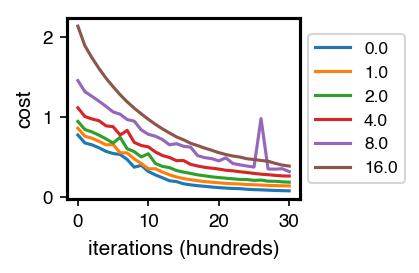

In [29]:
# Try different regularization parameters.
# Input the values by hand.
lambds = [0., 1., 2., 4., 8., 16.]

# Try different regularization parameters at random on a log scale.
# This is because we want to try values on different scales:
# from 0.01 to 10.
#r = -3*np.random.rand(1, 10) + 1
#lambds_array = 10**r
#lambds_tmp = lambds_array[0]     # Bring to numpy array to the correct
#lambds = lambds_tmp.tolist()     # list shape.

# Store the parameters, costs, and predictions on
# both train and test set.
params = {}
costs = {}
preds_train = {}
preds_test = {}

#np.random.seed(1)

for i in lambds:
    print ("Regularization parameter is: " + str(i))
    # Here we train the different models.
    params[lambds.index(i)], costs[lambds.index(i)] = L_layer_model_reg(train_x, train_y, layers_dims, 
                                                                        learning_rate = 0.0075, lambd = i, 
                                                                        num_iterations = 3000, print_cost = False,
                                                                        plot_cost = False)
    # Look at the final cost and predictions for the different models.
    print("Final cost: " + str(costs[lambds.index(i)][-1]))
    print(" ")
    print('Training set performance: ')
    preds_train[lambds.index(i)] = predict(train_x, train_y, params[lambds.index(i)])
    print(" ")
    print('Test set performance: ')
    preds_test[lambds.index(i)] = predict(test_x, test_y, params[lambds.index(i)])
    print ('\n' + "-------------------------------------------------------" + '\n')

# Plot the learning curves on the same plot for readability.
fig = plt.figure(dpi=150, figsize=(2, 1.6))

for i in lambds:
    plt.plot(costs[lambds.index(i)], label = str(i))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='center left', fontsize='small', bbox_to_anchor=(1, 0.5))
frame = legend.get_frame()
plt.show()

As a consequence of this hyperparameters search, we choose a learning rate of 0.0075 and a regularization parameter of 1, ending up with an accuracy of 99.5% on the training set and 84% on the test set.